# Price

In [1]:
!pip install pandas

In [2]:
import pandas as pd
# URL of the data file
url = "https://raw.githubusercontent.com/Xintong1122/SW/refs/heads/main/Data/UDAO_All_graph_coinmarketcap.csv"

# Read the CSV file
df = pd.read_csv(url)

# Read the file again with ';' as the column delimiter
df = pd.read_csv(url, delimiter=';')

# Optional: Save the cleaned data to a local file
df.to_csv('UDAO_price.csv', index=False)

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the GitHub URL
url = "https://raw.githubusercontent.com/Xintong1122/SW/refs/heads/main/Data/UDAO_price.csv"
data = pd.read_csv(url)

# Ensure the 'timestamp' column is in datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], format='ISO8601')

# Calculate a daily representative price (weighted average of high, low, and close)
data['daily_representative_price'] = (data['high'] + data['low'] + data['close']) / 3

# Calculate daily percentage change
data['daily_change_pct'] = (data['close'] - data['open']) / data['open'] * 100


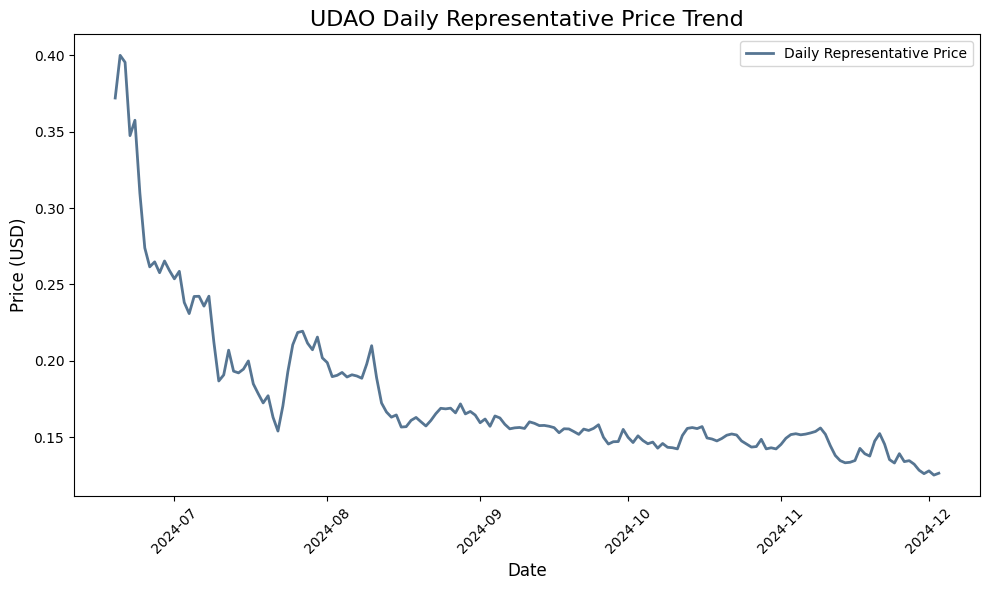

In [7]:
# 1. Plot Daily Representative Price Trend
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['daily_representative_price'], label='Daily Representative Price', linestyle='-', color='#2c5377', linewidth=2, alpha=0.8)
plt.title("UDAO Daily Representative Price Trend", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend(fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

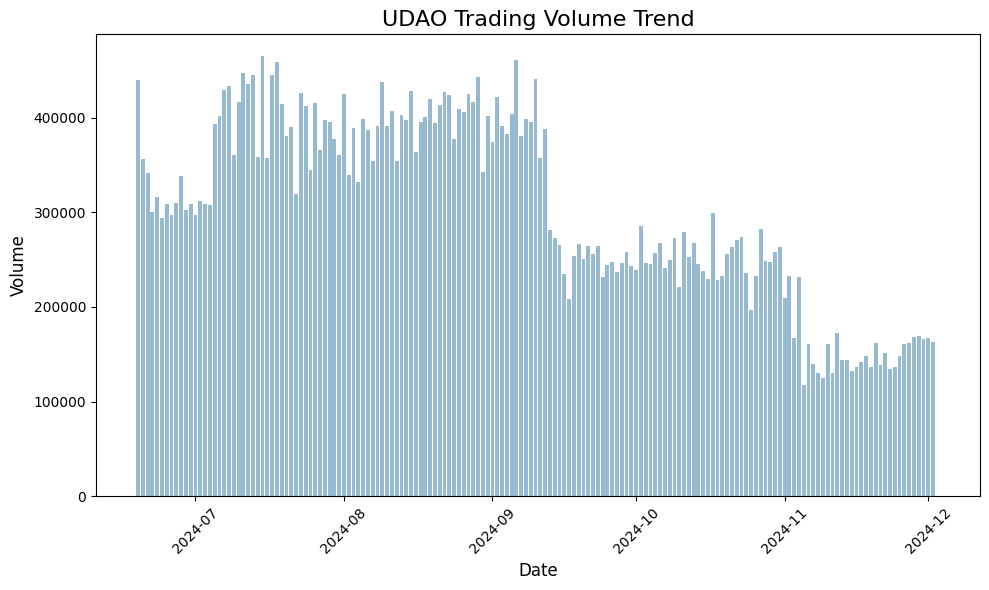

In [10]:
# 2. Plot Trading Volume Trend
plt.figure(figsize=(10, 6))
plt.bar(data['timestamp'], data['volume'], color='#6d9dbb', alpha=0.7) # color='skyblue'
plt.title("UDAO Trading Volume Trend", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

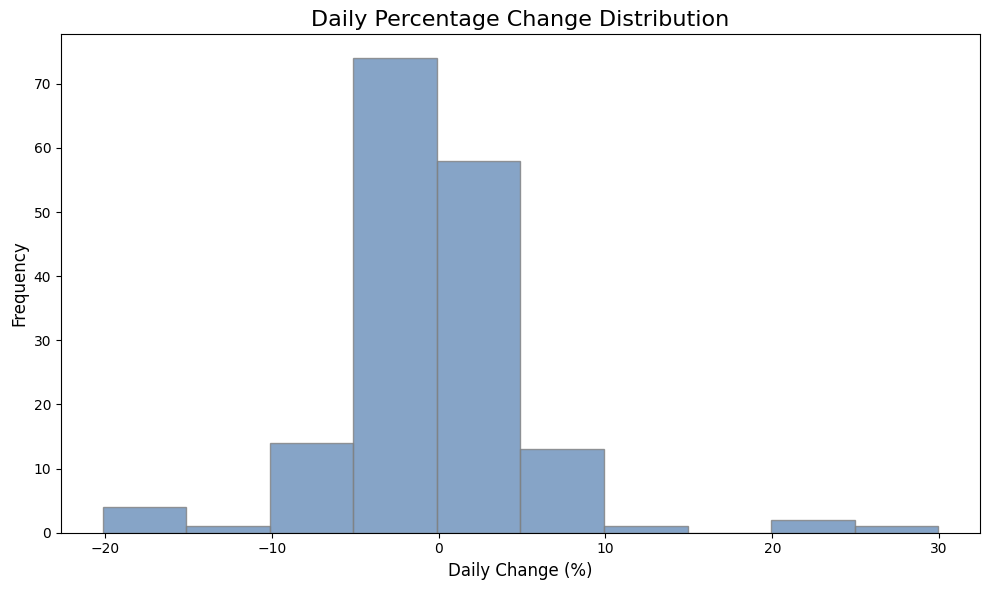

In [11]:
# 3. Plot Daily Percentage Change Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['daily_change_pct'], bins=10, alpha=0.8, color='#688eb9', edgecolor='grey')
plt.title("Daily Percentage Change Distribution", fontsize=16)
plt.xlabel("Daily Change (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


# UDAO Suggestion

## Data Loading and Cleaning

In [12]:
import pandas as pd

In [13]:
from google.colab import drive
drive.mount('/content/drive')  # 连接到 Google Drive

Mounted at /content/drive


In [14]:
UDAO_com = pd.read_csv('/content/drive/MyDrive/SW/Udao Official - 💡│feedback-suggestions [1144192747167821916].csv')

In [15]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
nltk.download('punkt_tab')
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [16]:
# emoticons
def load_dict_smileys():
    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }

# self defined contractions
def load_dict_contractions():
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "dont":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "isnt":"is not",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "youre":"you are",
        'yall':"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "irl":"in real life"
        }

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')

def load_dict_contractions():
    return {
        "can't": "cannot",
        "won't": "will not",
        "n't": " not",
        "'re": " are",
        "'s": " is",
        "'d": " would",
        "'ll": " will",
        "'t": " not",
        "'ve": " have",
        "'m": " am"
    }

def load_dict_smileys():
    return {
        ":)": "happy",
        ":(": "sad",
        ";)": "wink"
    }

def cleaner(tweet):
    '''
    Clean twitter text for sentiment analysis.
    '''
    # Escaping HTML characters
    tweet = BeautifulSoup(tweet, "html.parser").get_text()
    # Remove @ mentions
    tweet = re.sub(r"@[A-Za-z0-9]+", "", tweet)
    # Remove # hashtags
    tweet = re.sub(r"#[A-Za-z0-9_]+", "", tweet)
    # Remove http links
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    # Remove punctuation
    tweet = re.sub(r"[^\w\s]", "", tweet)
    # Remove numbers
    tweet = re.sub(r"\d", "", tweet)
    # Normalize CONTRACTIONS
    CONTRACTIONS = load_dict_contractions()
    tweet = tweet.replace("’", "'")
    words = tweet.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    tweet = " ".join(reformed)
    # Replace emoticons with words
    SMILEY = load_dict_smileys()
    words = tweet.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    tweet = " ".join(reformed)
    # Remove stopwords
    manual_screen = ['nft', 'crypto']  # 自定义移除的词
    stop_words = stopwords.words('english') + manual_screen
    words = tweet.split()
    reformed = [w for w in words if w.lower() not in stop_words]
    tweet = " ".join(reformed)
    # Lemmatize and keep only English words
    lemmatizer = WordNetLemmatizer()
    words = tweet.split()
    reformed = [lemmatizer.lemmatize(w) for w in words if w.encode().isalpha()]
    tweet = " ".join(reformed)
    return tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [18]:
UDAO_com['Date'] = pd.to_datetime(UDAO_com['Date'])
date_filtered = UDAO_com[(UDAO_com['Date'] >= '2024-06-19') & (UDAO_com['Date'] <= '2024-12-03')]
UDAO_com_clean = date_filtered.copy()
UDAO_com_clean['Cleaned_Content'] = UDAO_com_clean['Content'].dropna().apply(cleaner)
print(UDAO_com_clean[['Date', 'Content', 'Cleaned_Content']].head())

                                 Date  \
2991 2024-06-19 01:41:34.739000+08:00   
2992 2024-06-20 01:21:02.153000+08:00   
2993 2024-06-22 04:15:46.617000+08:00   
2994 2024-06-22 04:26:28.239000+08:00   
2995 2024-06-22 04:26:34.502000+08:00   

                                                Content  \
2991  WHY IS UDAO THE NEXT BIG THING :\nUdao is revo...   
2992  WHY IS UDAO THE NEXT BIG THING :\nUdao is revo...   
2993                             Always bullish on Udao   
2994                                    New era of Udao   
2995                                        Coin launch   

                                        Cleaned_Content  
2991  UDAO NEXT BIG THING Udao revolutionizing tech ...  
2992  UDAO NEXT BIG THING Udao revolutionizing tech ...  
2993                                Always bullish Udao  
2994                                       New era Udao  
2995                                        Coin launch  


## Word Frequency

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Ensure UDAO_com['Date'] is in datetime format
UDAO_com['Date'] = pd.to_datetime(UDAO_com['Date'])

# Filter the data for the desired date range
date_filtered = UDAO_com[(UDAO_com['Date'] >= '2024-06-19') & (UDAO_com['Date'] <= '2024-12-03')]

# Clean the 'Content' column
UDAO_com_clean = date_filtered.copy()
UDAO_com_clean['Cleaned_Content'] = UDAO_com_clean['Content'].dropna().apply(cleaner)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
# Define a function to analyze word frequency
def analyze_word_frequency(data, column):
    all_words = []
    for content in data[column].dropna():
        words = word_tokenize(content)
        lowered_words = [word.lower() for word in words]
        all_words.extend(lowered_words)
    fdist = nltk.FreqDist(all_words)
    return pd.DataFrame(fdist.most_common(50), columns=['word', 'count'])

# Analyze word frequency for the entire filtered dataset
word_freq = analyze_word_frequency(UDAO_com_clean, 'Cleaned_Content')

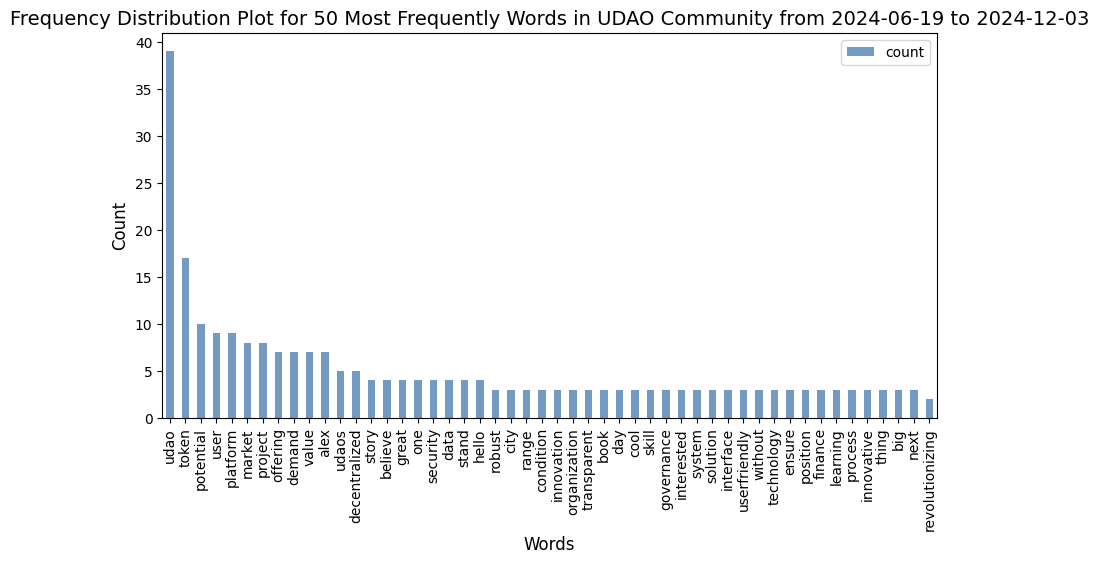

In [21]:
# Plot the word frequency distribution for the entire date range
fig, ax = plt.subplots(figsize=(10, 5))
word_freq.sort_values(by='count', ascending=False).plot.bar(x='word', y='count', ax=ax, color='#7499c2')
ax.set_title("Frequency Distribution Plot for 50 Most Frequently Words in UDAO Community from 2024-06-19 to 2024-12-03", fontsize=14)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

## LDA

In [22]:
! pip install gensim
! pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.8 MB/s eta 0:00:00


In [23]:
import re
import networkx as nx
import matplotlib.pyplot as plt
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

In [24]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(
    analyzer='word',
    min_df=200,# minimum required occurences of a word
    stop_words='english',# remove stop words
    lowercase=True,# convert all words to lowercase
    token_pattern='[a-zA-Z0-9]{3,}',# num of chars need to be > 3
    max_features=1000,# max number of unique words
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    start : Starting number of topics
    step : Topic number increasement size

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
def filter_by_date(df, start_date, end_date):
    df['Date'] = pd.to_datetime(df['Date'])
    return df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
start_date = "2024-06-19"
end_date = "2024-12-03"
UDAO_com_filtered = filter_by_date(UDAO_com_clean, start_date, end_date)
UDAO_com_clean = UDAO_com_filtered.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    """
    计算不同主题数目的 LDA 模型的 Coherence Score
    """
    from gensim.models import CoherenceModel
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=42,
                                       update_every=1,
                                       passes=10,
                                       alpha='auto',
                                       per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2024-06-19 - 2024-12-03

In [29]:
import gensim.corpora as corpora
texts = UDAO_com_clean['Cleaned_Content'].dropna().apply(lambda x: str(x).split(' ')).values
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
start = 2
limit = 20
step = 2
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=start, limit=limit, step=step)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


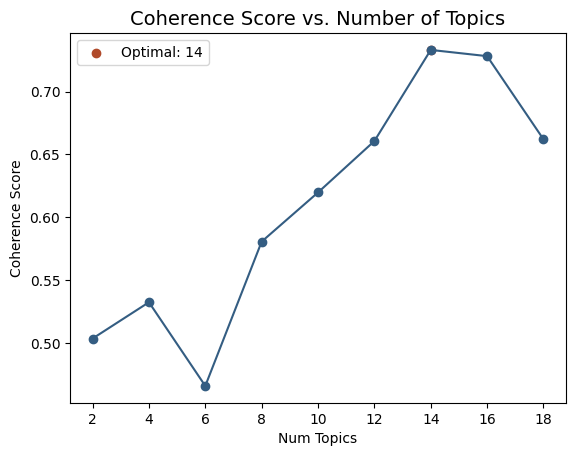

Optimal Number of Topics: 14
Maximum Coherence Score: 0.7332593134618535


In [32]:
x = range(start, limit, step)
max_coherence = max(coherence_values)
optimal_x = start + coherence_values.index(max_coherence) * step


plt.plot(x, coherence_values, marker='o', color='#345d82')
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics", fontsize=14)
plt.legend(["Coherence Score"], loc='best')
plt.scatter(optimal_x, max_coherence, color='#b04a2a', label=f'Optimal: {optimal_x}')
plt.legend(loc='best')
plt.show()

print(f"Optimal Number of Topics: {optimal_x}")
print(f"Maximum Coherence Score: {max_coherence}")

In [33]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
data_matrix = vectorizer.fit_transform(UDAO_com_clean['Cleaned_Content'].dropna()).toarray()

lda = LatentDirichletAllocation(n_components=14, random_state=0)
lda.fit(data_matrix)

pyLDAvis_data = pyLDAvis.prepare(
    topic_term_dists=lda.components_,
    doc_topic_dists=lda.transform(data_matrix),
    doc_lengths=np.sum(data_matrix, axis=1),
    vocab=vectorizer.get_feature_names_out(),
    term_frequency=np.sum(data_matrix, axis=0)
)

pyLDAvis.display(pyLDAvis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
for i, topic in enumerate(lda.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])  # 使用 get_feature_names_out() 获取词汇
    print('\n')

Top 10 words for topic #0:
['channel', 'coin', 'launch', 'amazing', 'story', 'open', 'ticket', 'hello', 'bullish', 'okay']


Top 10 words for topic #1:
['channel', 'coin', 'launch', 'amazing', 'story', 'open', 'ticket', 'hello', 'bullish', 'okay']


Top 10 words for topic #2:
['channel', 'launch', 'coin', 'story', 'ticket', 'open', 'hello', 'bullish', 'okay', 'amazing']


Top 10 words for topic #3:
['launch', 'coin', 'amazing', 'story', 'open', 'ticket', 'hello', 'bullish', 'okay', 'channel']


Top 10 words for topic #4:
['doubt', 'commission', 'disturb', 'help', 'direct', 'send', 'sorry', 'market', 'hello', 'interested']


Top 10 words for topic #5:
['data', 'value', 'user', 'offering', 'demand', 'udaos', 'market', 'potential', 'token', 'udao']


Top 10 words for topic #6:
['life', 'join', 'way', 'hope', 'page', 'day', 'city', 'book', 'story', 'alex']


Top 10 words for topic #7:
['opinion', 'team', 'hello', 'token', 'believe', 'reward', 'issue', 'user', 'platform', 'udao']


Top 10 w

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Network Analysis

In [35]:
import pandas as pd
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
texts = UDAO_com_clean['Cleaned_Content'].dropna().tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
def calculate_bigram(texts):
    bigrams = []
    for text in texts:
        token = word_tokenize(text)
        token = [i for i in token if len(i) > 2]
        bigram = list(ngrams(token, 2))
        bigrams.extend(bigram)


    bi_count = dict(Counter(bigrams))

    df = pd.DataFrame.from_dict(bi_count, orient='index').reset_index()
    df.columns = ['bigram', 'count']
    return df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
bigram_df = calculate_bigram(texts)
top_bigrams = bigram_df.sort_values(by='count', ascending=False).iloc[:25]
print(top_bigrams)

                        bigram  count
83               (UDAO, Token)      4
47   (userfriendly, interface)      3
0                 (UDAO, NEXT)      2
73      (condition, influence)      2
85           (stand, embodies)      2
84              (Token, stand)      2
82               (VALUE, UDAO)      2
81              (RAISE, VALUE)      2
80               (UDAO, RAISE)      2
1                  (NEXT, BIG)      2
78                (like, UDAO)      2
77               (token, like)      2
76   (cryptocurrencies, token)      2
75  (demand, cryptocurrencies)      2
74         (influence, demand)      2
72  (macroeconomic, condition)      2
59     (POTENTIAL, Ultimately)      2
71  (sentiment, macroeconomic)      2
70       (investor, sentiment)      2
69           (trend, investor)      2
68             (market, trend)      2
67           (Factors, market)      2
66            (value, Factors)      2
65          (potential, value)      2
64      (determine, potential)      2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Graph now has 395 nodes and 524 edges
G_sub now has 100 nodes and 121 edges


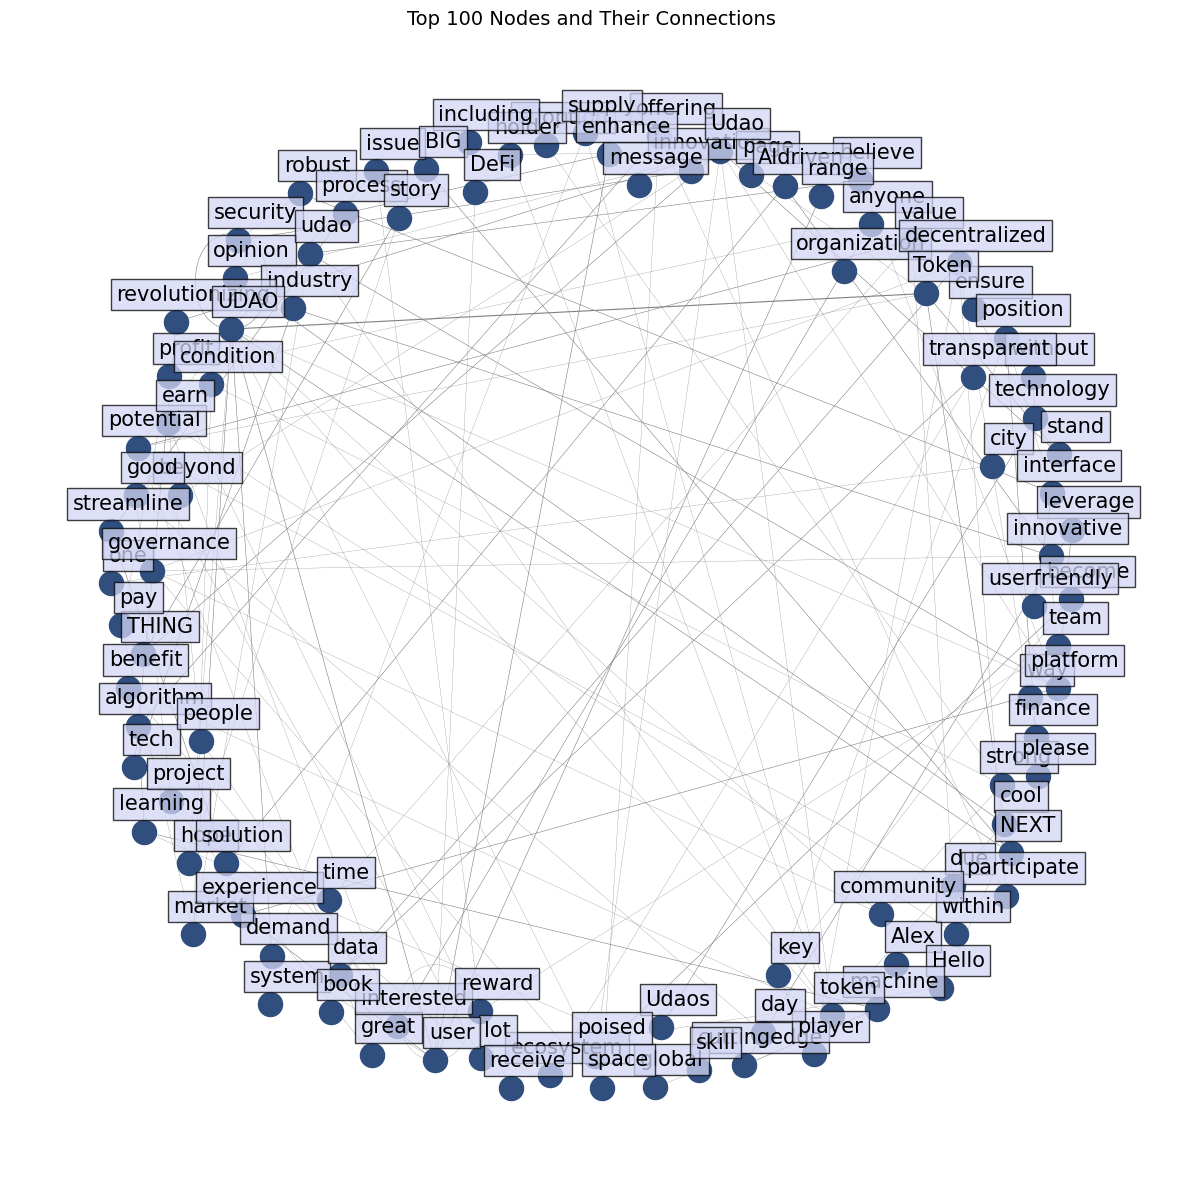

In [45]:
G_word = nx.Graph()
for _, row in bigram_df.iterrows():
    bigram = row['bigram']
    count = row['count']
    G_word.add_edge(bigram[0], bigram[1], weight=(count / 100))

print('Graph now has', len(G_word.nodes()), 'nodes and', len(G_word.edges()), 'edges')
top_nodes = sorted(G_word.degree, key=lambda x: x[1], reverse=True)[:100]
to_keep = [node[0] for node in top_nodes]
G_word_sub = G_word.subgraph(to_keep)
print('G_sub now has', len(G_word_sub.nodes()), 'nodes and', len(G_word_sub.edges()), 'edges')
fig, ax = plt.subplots(figsize=(15, 15))

pos = nx.spring_layout(G_word_sub,k=10) # spring layout
edgewidth = [d['weight']*20 for (u,v,d) in G_word_sub.edges(data=True)]
nodesize = [[]]
textsize = []


nx.draw_networkx(G_word_sub, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='grey',
                 node_color='#304E7E',
                 with_labels = False,
                 ax=ax)

plt.grid(None)
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='#D2D6F5',alpha=0.75), #text box color
            horizontalalignment='center', fontsize=15)
plt.title("Top 100 Nodes and Their Connections", fontsize=14)
plt.box(False)
plt.grid(False)
plt.show()

# Study Together Motivation

## Data Loading and Cleaning

In [46]:
STU_com = pd.read_csv('/content/drive/MyDrive/SW/⛄ Study Together - 💭 Community - motivation [708721340575776829].csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
nltk.download('punkt_tab')
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [48]:
# emoticons
def load_dict_smileys():
    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }

# self defined contractions
def load_dict_contractions():
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "dont":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "isnt":"is not",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "youre":"you are",
        'yall':"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "irl":"in real life"
        }

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
nltk.download('stopwords')
nltk.download('wordnet')

def load_dict_contractions():
    return {
        "can't": "cannot",
        "won't": "will not",
        "n't": " not",
        "'re": " are",
        "'s": " is",
        "'d": " would",
        "'ll": " will",
        "'t": " not",
        "'ve": " have",
        "'m": " am"
    }

def load_dict_smileys():
    return {
        ":)": "happy",
        ":(": "sad",
        ";)": "wink"
    }

def cleaner(tweet):
    '''
    Clean twitter text for sentiment analysis.
    '''
    # Escaping HTML characters
    tweet = BeautifulSoup(tweet, "html.parser").get_text()
    # Remove @ mentions
    tweet = re.sub(r"@[A-Za-z0-9]+", "", tweet)
    # Remove # hashtags
    tweet = re.sub(r"#[A-Za-z0-9_]+", "", tweet)
    # Remove http links
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    # Remove punctuation
    tweet = re.sub(r"[^\w\s]", "", tweet)
    # Remove numbers
    tweet = re.sub(r"\d", "", tweet)
    # Normalize CONTRACTIONS
    CONTRACTIONS = load_dict_contractions()
    tweet = tweet.replace("’", "'")
    words = tweet.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    tweet = " ".join(reformed)
    # Replace emoticons with words
    SMILEY = load_dict_smileys()
    words = tweet.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    tweet = " ".join(reformed)
    # Remove stopwords
    manual_screen = ['nft', 'crypto']  # 自定义移除的词
    stop_words = stopwords.words('english') + manual_screen
    words = tweet.split()
    reformed = [w for w in words if w.lower() not in stop_words]
    tweet = " ".join(reformed)
    # Lemmatize and keep only English words
    lemmatizer = WordNetLemmatizer()
    words = tweet.split()
    reformed = [lemmatizer.lemmatize(w) for w in words if w.encode().isalpha()]
    tweet = " ".join(reformed)
    return tweet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
STU_com['Date'] = pd.to_datetime(STU_com['Date'])
date_filtered = STU_com[(STU_com['Date'] >= '2024-06-19') & (STU_com['Date'] <= '2024-12-03')]
STU_com_clean = date_filtered.copy()
STU_com_clean['Cleaned_Content'] = STU_com_clean['Content'].dropna().apply(cleaner)
print(STU_com_clean[['Date', 'Content', 'Cleaned_Content']].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-49-b5e2d22b984f>:30: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  tweet = BeautifulSoup(tweet, "html.parser").get_text()
<ipython-input-49-b5e2d22b984f>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, "html.parser").get_text()


                                  Date  \
43113 2024-06-19 00:00:47.386000+08:00   
43114 2024-06-19 00:10:11.579000+08:00   
43115 2024-06-19 00:24:22.789000+08:00   
43116 2024-06-19 00:38:00.313000+08:00   
43117 2024-06-19 00:39:43.207000+08:00   

                                                 Content  \
43113  my motivation, just hide your phone and open t...   
43114                                                NaN   
43115                                                NaN   
43116           How does it feel when you are at the top   
43117  I don't know but somehow I don't want feel it,...   

                                     Cleaned_Content  
43113  motivation hide phone open book studying well  
43114                                            NaN  
43115                                            NaN  
43116                                       feel top  
43117  dont know somehow dont want feel seems lonely  


## Word Frequency

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Ensure STU_com['Date'] is in datetime format
STU_com['Date'] = pd.to_datetime(STU_com['Date'])

# Filter the data for the desired date range
date_filtered = STU_com[(STU_com['Date'] >= '2024-06-19') & (STU_com['Date'] <= '2024-12-03')]

# Clean the 'Content' column
STU_com_clean = date_filtered.copy()
STU_com_clean['Cleaned_Content'] = STU_com_clean['Content'].dropna().apply(cleaner)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-49-b5e2d22b984f>:30: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  tweet = BeautifulSoup(tweet, "html.parser").get_text()
<ipython-input-49-b5e2d22b984f>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, "html.parser")

In [52]:
# Define a function to analyze word frequency
def analyze_word_frequency(data, column):
    all_words = []
    for content in data[column].dropna():
        words = word_tokenize(content)
        lowered_words = [word.lower() for word in words]
        all_words.extend(lowered_words)
    fdist = nltk.FreqDist(all_words)
    return pd.DataFrame(fdist.most_common(50), columns=['word', 'count'])

# Analyze word frequency for the entire filtered dataset
word_freq = analyze_word_frequency(STU_com_clean, 'Cleaned_Content')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


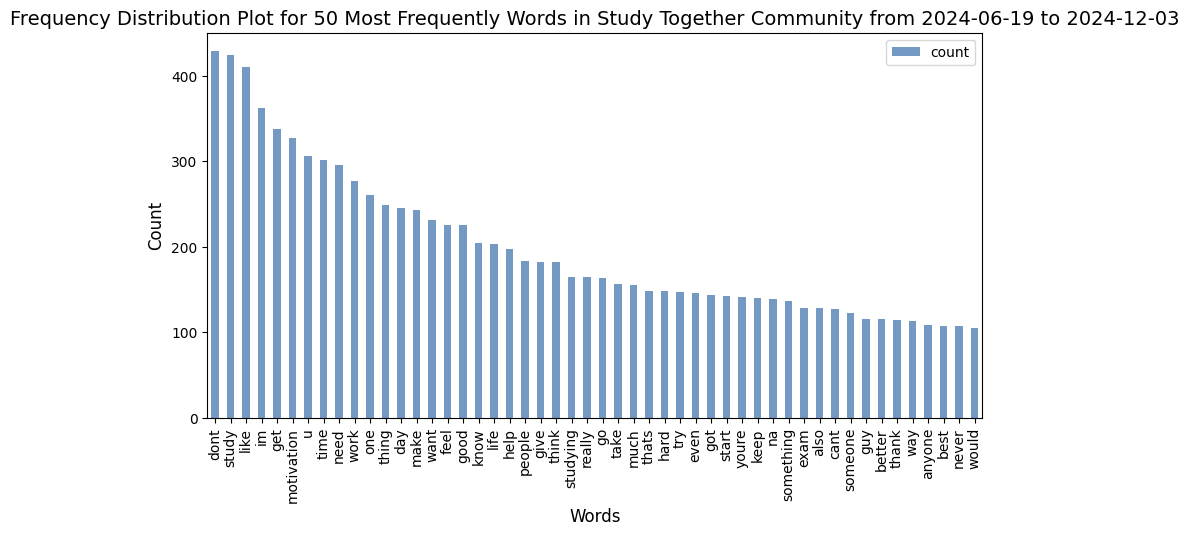

In [54]:
# Plot the word frequency distribution for the entire date range
fig, ax = plt.subplots(figsize=(10, 5))
word_freq.sort_values(by='count', ascending=False).plot.bar(x='word', y='count', ax=ax, color='#7499c2')
ax.set_title("Frequency Distribution Plot for 50 Most Frequently Words in Study Together Community from 2024-06-19 to 2024-12-03", fontsize=14)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

## LDA

In [55]:
! pip install gensim
! pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
import re
import networkx as nx
import matplotlib.pyplot as plt
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(
    analyzer='word',
    min_df=200,# minimum required occurences of a word
    stop_words='english',# remove stop words
    lowercase=True,# convert all words to lowercase
    token_pattern='[a-zA-Z0-9]{3,}',# num of chars need to be > 3
    max_features=1000,# max number of unique words
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    start : Starting number of topics
    step : Topic number increasement size

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
def filter_by_date(df, start_date, end_date):
    df['Date'] = pd.to_datetime(df['Date'])
    return df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
start_date = "2024-06-19"
end_date = "2024-12-03"
STU_com_filtered = filter_by_date(STU_com_clean, start_date, end_date)
STU_com_clean = STU_com_filtered.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    """
    计算不同主题数目的 LDA 模型的 Coherence Score
    """
    from gensim.models import CoherenceModel
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=42,
                                       update_every=1,
                                       passes=10,
                                       alpha='auto',
                                       per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2024-06-19 - 2024-12-03

In [62]:
import gensim.corpora as corpora
texts = STU_com_clean['Cleaned_Content'].dropna().apply(lambda x: str(x).split(' ')).values
id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
start = 2
limit = 20
step = 2
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=start, limit=limit, step=step)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


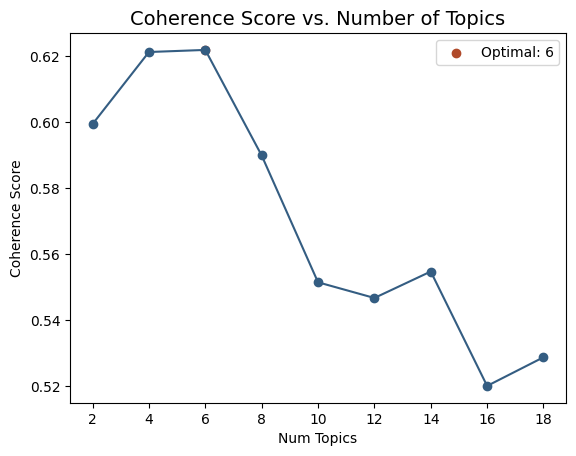

Optimal Number of Topics: 6
Maximum Coherence Score: 0.6218446625574141


In [64]:
x = range(start, limit, step)
max_coherence = max(coherence_values)
optimal_x = start + coherence_values.index(max_coherence) * step


plt.plot(x, coherence_values, marker='o', color='#345d82')
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics", fontsize=14)
plt.legend(["Coherence Score"], loc='best')
plt.scatter(optimal_x, max_coherence, color='#b04a2a', label=f'Optimal: {optimal_x}')
plt.legend(loc='best')
plt.show()

print(f"Optimal Number of Topics: {optimal_x}")
print(f"Maximum Coherence Score: {max_coherence}")

In [66]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
data_matrix = vectorizer.fit_transform(STU_com_clean['Cleaned_Content'].dropna()).toarray()

lda = LatentDirichletAllocation(n_components=6, random_state=0)
lda.fit(data_matrix)

pyLDAvis_data = pyLDAvis.prepare(
    topic_term_dists=lda.components_,
    doc_topic_dists=lda.transform(data_matrix),
    doc_lengths=np.sum(data_matrix, axis=1),
    vocab=vectorizer.get_feature_names_out(),
    term_frequency=np.sum(data_matrix, axis=0)
)

pyLDAvis.display(pyLDAvis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
for i, topic in enumerate(lda.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])  # 使用 get_feature_names_out() 获取词汇
    print('\n')

Top 10 words for topic #0:
['video', 'bro', 'dont', 'thats', 'yes', 'studying', 'best', 'day', 'start', 'study']


Top 10 words for topic #1:
['way', 'thought', 'like', 'use', 'try', 'got', 'dont', 'love', 'think', 'good']


Top 10 words for topic #2:
['hey', 'want', 'hi', 'guy', 'really', 'feel', 'dont', 'like', 'study', 'im']


Top 10 words for topic #3:
['bad', 'new', 'im', 'good', 'better', 'thanks', 'day', 'thank', 'make', 'thing']


Top 10 words for topic #4:
['going', 'learn', 'discipline', 'channel', 'want', 'hard', 'help', 'work', 'need', 'motivation']


Top 10 words for topic #5:
['quote', 'yeah', 'ur', 'people', 'life', 'work', 'like', 'dont', 'time', 'know']




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Network Analysis

In [68]:
import pandas as pd
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
texts = STU_com_clean['Cleaned_Content'].dropna().tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
def calculate_bigram(texts):
    bigrams = []
    for text in texts:
        token = word_tokenize(text)
        token = [i for i in token if len(i) > 2]
        bigram = list(ngrams(token, 2))
        bigrams.extend(bigram)


    bi_count = dict(Counter(bigrams))

    df = pd.DataFrame.from_dict(bi_count, orient='index').reset_index()
    df.columns = ['bigram', 'count']
    return df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
bigram_df = calculate_bigram(texts)
top_bigrams = bigram_df.sort_values(by='count', ascending=False).iloc[:25]
print(top_bigrams)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                   bigram  count
2095         (feel, like)     66
74     (need, motivation)     49
7            (dont, know)     42
10           (dont, want)     25
2669           (can, not)     20
282         (keep, going)     20
599   (motivation, study)     18
81             (one, day)     18
1076         (hard, work)     17
2102         (good, luck)     17
3550    (start, studying)     15
3785        (get, better)     15
2094         (dont, feel)     15
5450         (work, hard)     15
3403        (need, study)     15
9720         (make, feel)     15
564         (dont, think)     14
4646       (high, school)     14
5183         (need, help)     13
145          (every, day)     13
537          (Good, luck)     13
945         (want, study)     13
5844       (really, want)     12
14     (give, motivation)     12
575        (keep, trying)     12


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Graph now has 7786 nodes and 28523 edges
G_sub now has 100 nodes and 1887 edges


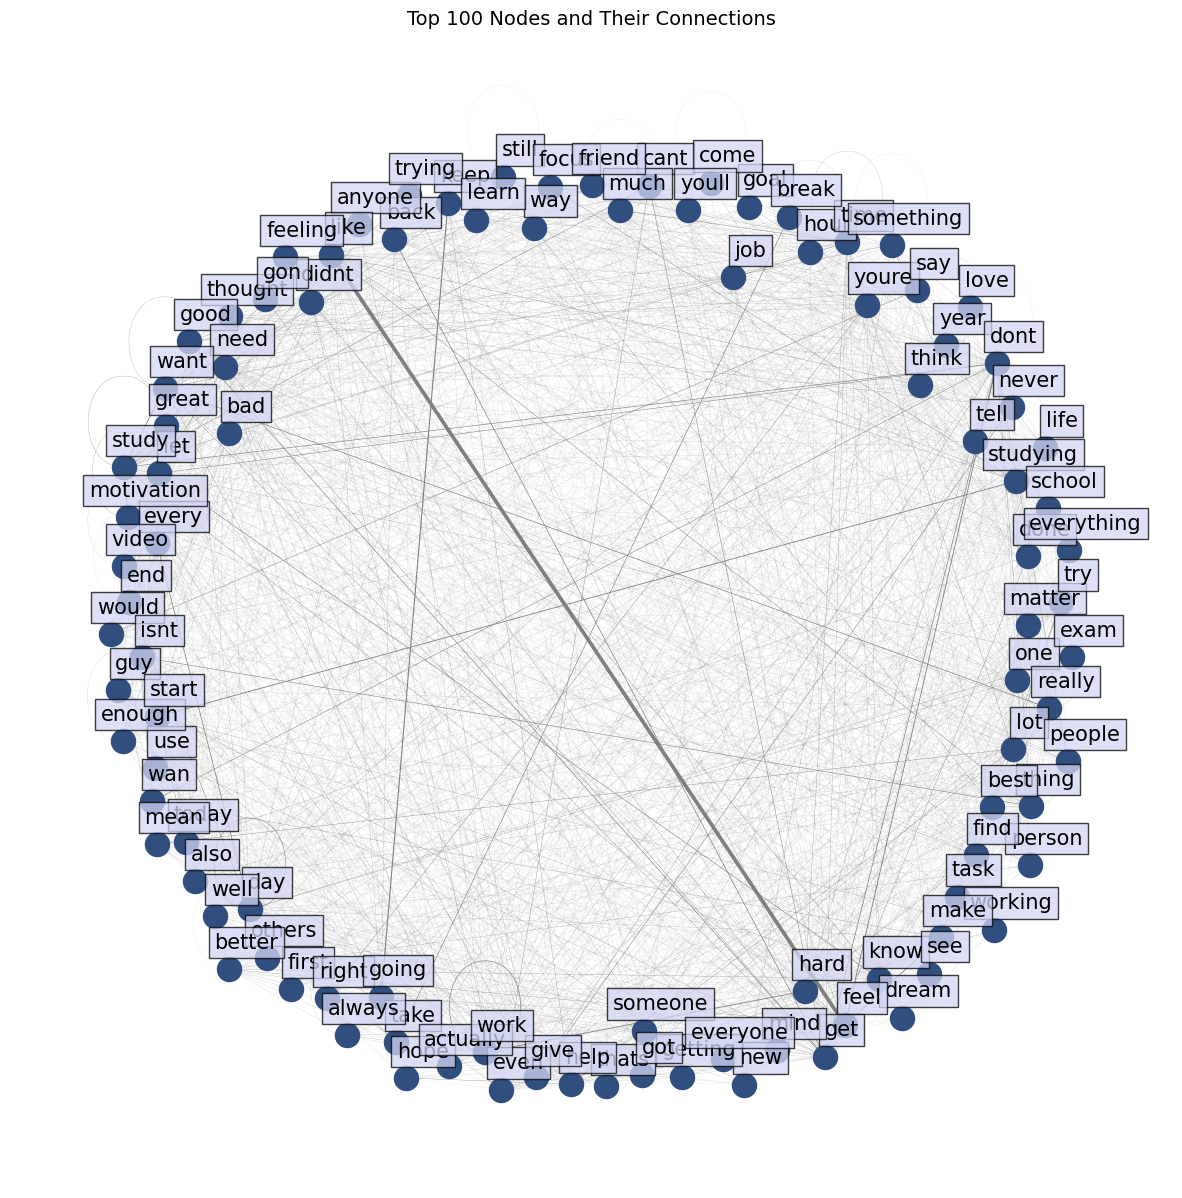

In [72]:
G_word = nx.Graph()
for _, row in bigram_df.iterrows():
    bigram = row['bigram']
    count = row['count']
    G_word.add_edge(bigram[0], bigram[1], weight=(count / 500))

print('Graph now has', len(G_word.nodes()), 'nodes and', len(G_word.edges()), 'edges')
top_nodes = sorted(G_word.degree, key=lambda x: x[1], reverse=True)[:100]
to_keep = [node[0] for node in top_nodes]
G_word_sub = G_word.subgraph(to_keep)
print('G_sub now has', len(G_word_sub.nodes()), 'nodes and', len(G_word_sub.edges()), 'edges')
fig, ax = plt.subplots(figsize=(15, 15))

pos = nx.spring_layout(G_word_sub,k=10) # spring layout
edgewidth = [d['weight']*20 for (u,v,d) in G_word_sub.edges(data=True)]
nodesize = [[]]
textsize = []


nx.draw_networkx(G_word_sub, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='grey',
                 node_color='#304E7E',
                 with_labels = False,
                 ax=ax)

plt.grid(None)
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='#D2D6F5', alpha=0.75), #text box color
            horizontalalignment='center', fontsize=15)
plt.title("Top 100 Nodes and Their Connections", fontsize=14)
plt.box(False)
plt.grid(False)
plt.show()